In [1]:
from preprocess import MammoPreprocessorCBISDDSM
import numpy as np
import dicomsdl as dicom
from glob import glob
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

/nfs/home/912c2e22633dde2e/CBIS-DDSM-segformer/preprocess.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
img_path = "./data/raw/full"
masks = "./data/raw/mask"
case_desc_csv = "./data/raw/mass_case_description_train_set.csv"

In [3]:
%%time
dst = MammoPreprocessorCBISDDSM(img_path, masks, 
                                mammo_imgs_csv="./data/raw/mammo_imgs_csv.csv",
                                masks_csv="./data/raw/masks_csv.csv",
                                case_desc_csv=case_desc_csv, 
                                image_size=(512,512))

CPU times: user 158 ms, sys: 408 ms, total: 566 ms
Wall time: 1.92 s


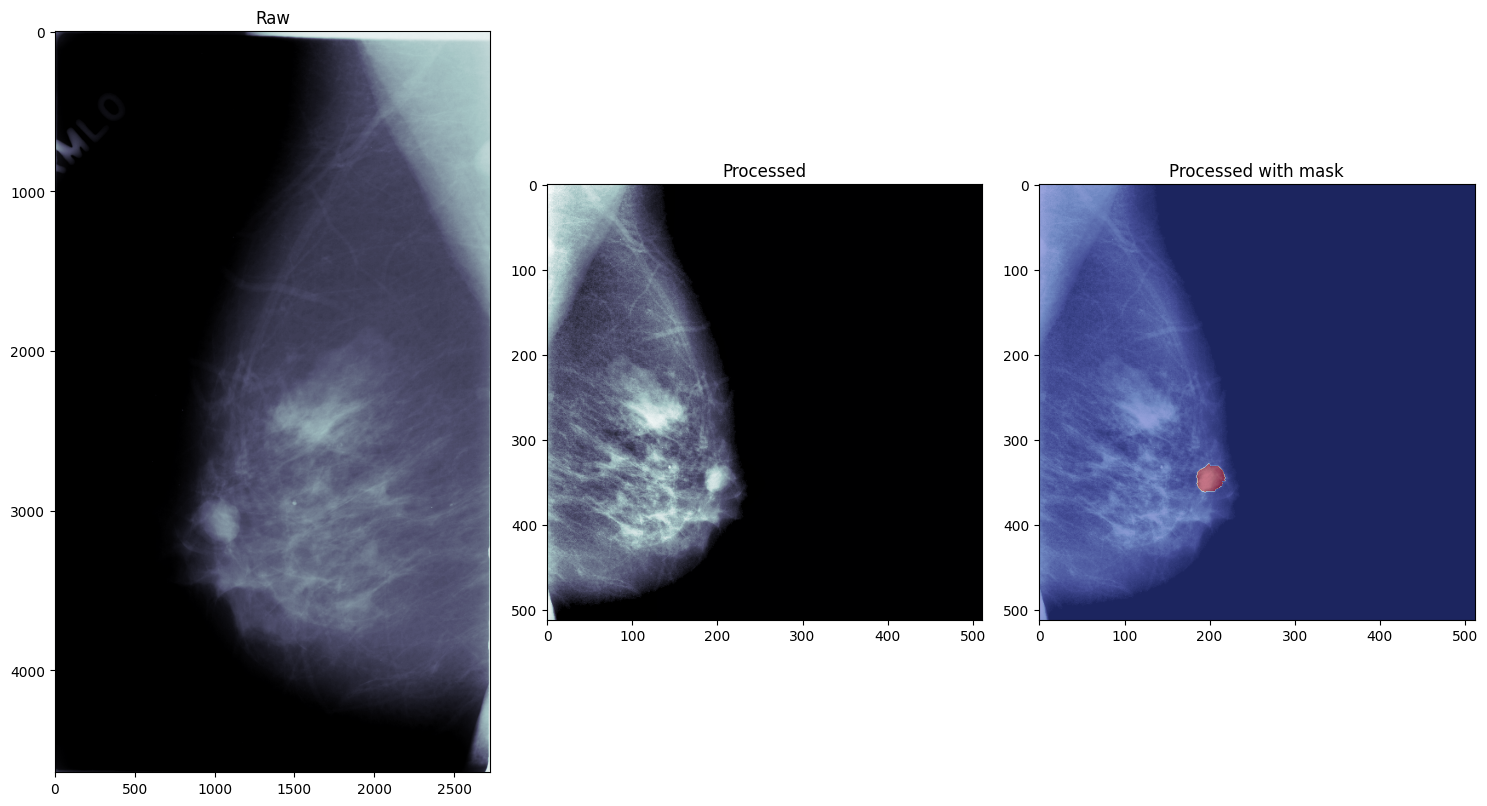

In [14]:
i = np.random.randint(0, len(dst.images))
example = dst.images[i]

raw_img = dicom.open(example).pixelData()
processed_img, processed_mask = dst.preprocess_image(example, save=False, hist_eq_type="clahe")


_, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

axs[0].imshow(raw_img, cmap="bone")
axs[0].set_title("Raw")

axs[1].imshow(processed_img, cmap="bone")
axs[1].set_title("Processed")

axs[2].imshow(processed_img, cmap="bone")
axs[2].imshow(processed_mask, alpha=0.50, cmap="coolwarm")
axs[2].set_title("Processed with mask")

plt.tight_layout();

In [17]:
dst.preprocess_all(fformat="png", hist_eq_type = "clahe", n_jobs = -1, save=True)

  0%|          | 0/1231 [00:00<?, ?it/s]

Parallel preprocessing done!
